# Data Exploration#

In [34]:
import numpy as np 
import pandas as pd 
import os
import demoji
import matplotlib.pyplot as plt
import re
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from wordcloud import WordCloud , STOPWORDS

In [10]:
### DataSource###
train_df = pd.read_csv("D:\\Downloads\\nlp-getting-started\\train.csv")
test_df = pd.read_csv("D:\\Downloads\\nlp-getting-started\\test.csv")

In [11]:
len(train_df)

7613

In [12]:
len(test_df)

3263

In [13]:
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [14]:
test_df.head(5)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [15]:
###Text Data showing No Disastertweet###
train_df[train_df["target"]==0]["text"].values

array(["What's up man?", 'I love fruits', 'Summer is lovely', ...,
       'These boxes are ready to explode! Exploding Kittens finally arrived! gameofkittens #explodingkittens\x89Û_ https://t.co/TFGrAyuDC5',
       'Sirens everywhere!',
       'I just heard a really loud bang and everyone is asleep great'],
      dtype=object)

In [16]:
###Text Data showing No Disastertweet###
train_df[train_df["target"] == 1]["text"].values

array(['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
       'Forest fire near La Ronge Sask. Canada',
       "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
       ...,
       'M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ',
       'Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.',
       'The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d'],
      dtype=object)

# Data Visualization#

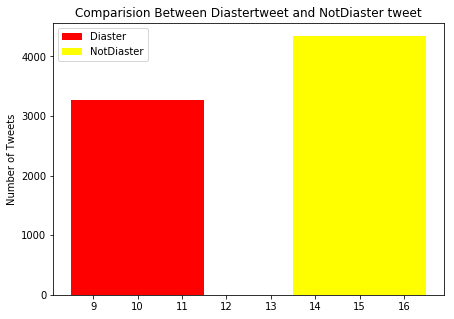

In [11]:
Real_len = train_df[train_df['target'] == 1].shape[0]
Not_len = train_df[train_df['target'] == 0].shape[0]
plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10,Real_len,3, label="Diaster", color='Red')
plt.bar(15,Not_len,3, label="NotDiaster", color='Yellow')
plt.legend()
plt.ylabel('Number of Tweets')
plt.title('Comparision Between Diastertweet and NotDiaster tweet ')
plt.show()

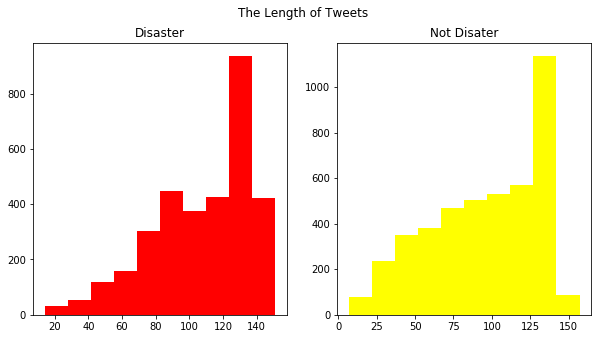

In [10]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=train_df[train_df['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='yellow')
ax2.set_title('Not Disater')
tweet_len=train_df[train_df['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='Red')
ax1.set_title('Disaster')
fig.suptitle('The Length of Tweets')
plt.show()

# Data Processing/Cleaning #

In [17]:
### LetsClean our data###
### we donothaveLocationdata for mostof them so drop##
copy_train_data = train_df.drop(columns="location")
copy_test_data = test_df.drop(columns="location")

In [18]:
copy_train_data

,id,keyword,text,target
0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,I'm afraid that the tornado is coming to our a...,1


In [19]:
#### Removethis kinds of URLfrom thedata###
copy_train_data['text'][40]


'Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw'

In [20]:
def Remove_Url(string):
    return re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%|\-)*\b', '', string)
copy_train_data['text'] = copy_train_data['text'].apply(Remove_Url)
test_df['text']= test_df['text'].apply(Remove_Url)

In [21]:
###Remove UnwantedCharcters##
def UnwantedCharcters(string):
    thestring = re.sub(r'[^a-zA-Z\s]','', string)
    # remove word of length less than 2
    thestring = re.sub(r'\b\w{1,2}\b', '', thestring)
    #https://www.geeksforgeeks.org/python-remove-unwanted-spaces-from-string/
    return re.sub(' +', ' ', thestring) 
copy_train_data['text'] = copy_train_data['text'].apply(UnwantedCharcters)
test_df['text']= test_df['text'].apply(UnwantedCharcters)

In [22]:
###Remove Tag##
def Remove_Tag(string):
    pattern = re.compile(r'[@|#][^\s]+')
    matches = pattern.findall(string)
    tags = [match[1:] for match in matches]
    # Removing tags from main string
    string = re.sub(pattern, '', string)
    # More weightage to tag by adding them 3 times
    return string + ' ' + ' '.join(tags) + ' '+ ' '.join(tags) + ' ' + ' '.join(tags)
copy_train_data['text'] = copy_train_data['text'].apply(Remove_Tag)
test_df['text']= test_df['text'].apply(Remove_Tag)
test_df['text']= test_df['text'].apply(Remove_Tag)

In [23]:
###Drop Html tags##
def Remove_html(string):
    return re.sub(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', '', str(string))
copy_train_data['text'] = copy_train_data['text'].apply(Remove_html)

In [24]:
copy2_train_data = copy_train_data.drop(columns="keyword")
copy2_train_data.head(5)

,id,text,target
0,1,Our Deeds are the Reason this earthquake May A...,1
1,4,Forest fire near Ronge Sask Canada,1
2,5,All residents asked shelter place are being no...,1
3,6,people receive wildfires evacuation orders Ca...,1
4,7,Just got sent this photo from Ruby Alaska smok...,1


In [25]:
copy2_test_data = copy_test_data.drop(columns="keyword")
copy2_test_data.head(5)

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan


# Build Model #

In [26]:
count_vectorizer = feature_extraction.text.CountVectorizer()
train_vectors = count_vectorizer.fit_transform(copy2_train_data["text"])
test_vectors = count_vectorizer.fit_transform(copy2_test_data["text"])
x_train=train_vectors
x_test=test_vectors
y_train = copy2_train_data['target']



In [27]:
clf = linear_model.RidgeClassifier()
scores = model_selection.cross_val_score(clf, train_vectors, copy2_train_data["target"], cv=10, scoring="f1")
sum(scores)/len(scores)

C:\Users\Meti\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\Meti\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review y

C:\Users\Meti\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Meti\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

0.5263279903582246

In [29]:
clf.fit(train_vectors, copy2_train_data["target"])

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)

In [30]:
sample_submission = pd.read_csv("D:\\Downloads\\nlp-getting-started\\sample_submission.csv")